# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

620

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Starting URL for OpenWeatherMap API call
url = "http://api.openweathermap.org/data/2.5/weather?"
unit = 'metric'

url_request = f"{url}appid={weather_api_key}&units={unit}&q=" 


# weather_response = requests.get(url_request)
# print(weather_response)

In [4]:
# Make empty lists to store the data
cityname = []
lat = []
lng = []
date = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []

record = 0
sets = 1

print("Beginning Data Retrieval")
print("-----------------------------")

# Iterate through the cities

# JSON returns data from cities laid within definite circle that is specified by 
# center point ('lat', 'lon') and expected number of cities ('cnt') 
# around this point. The default number of cities is 10, the maximum is 50.
        

for city in cities:
    try:
        weather_response = requests.get(url_request+city).json()
        lat.append(weather_response["coord"]["lat"])
        lng.append(weather_response["coord"]["lon"])
        max_temp.append(weather_response["main"]["temp_max"])
        humidity.append(weather_response["main"]["humidity"])
        cloudiness.append(weather_response["clouds"]["all"])
        wind_speed.append(weather_response["wind"]["speed"])
        country.append(weather_response["sys"]["country"])
        date.append(weather_response["dt"])
        
        if record >= 49:
            record = 0
            sets += 1
            cityname.append(city)
        else:
            record += 1
            cityname.append(city)
        print(f"Processing Record {record} of Set {sets} | {city}")
        
    except Exception:
        print(f"City not found. Skipping...")

print("-------------------------------")
print("Data Retrieval Complete")
print("--------------------------------")


Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | haines junction
Processing Record 2 of Set 1 | ukiah
Processing Record 3 of Set 1 | bethel
Processing Record 4 of Set 1 | east london
Processing Record 5 of Set 1 | mar del plata
Processing Record 6 of Set 1 | busselton
Processing Record 7 of Set 1 | sao filipe
Processing Record 8 of Set 1 | avarua
Processing Record 9 of Set 1 | nemuro
Processing Record 10 of Set 1 | hay river
Processing Record 11 of Set 1 | bonavista
Processing Record 12 of Set 1 | barrow
Processing Record 13 of Set 1 | atambua
Processing Record 14 of Set 1 | ushuaia
Processing Record 15 of Set 1 | puerto ayora
Processing Record 16 of Set 1 | rikitea
Processing Record 17 of Set 1 | vilyuysk
Processing Record 18 of Set 1 | yar-sale
Processing Record 19 of Set 1 | atasu
Processing Record 20 of Set 1 | qaanaaq
Processing Record 21 of Set 1 | merrill
Processing Record 22 of Set 1 | castro
Processing Record 23 of Set 1 | port elizabeth
Pr

Processing Record 35 of Set 4 | zhigansk
Processing Record 36 of Set 4 | cabo san lucas
Processing Record 37 of Set 4 | ciocanesti
Processing Record 38 of Set 4 | taoudenni
Processing Record 39 of Set 4 | myanaung
City not found. Skipping...
City not found. Skipping...
Processing Record 40 of Set 4 | carauari
Processing Record 41 of Set 4 | salinopolis
Processing Record 42 of Set 4 | orsha
Processing Record 43 of Set 4 | hobyo
Processing Record 44 of Set 4 | igarka
Processing Record 45 of Set 4 | lompoc
Processing Record 46 of Set 4 | longyearbyen
Processing Record 47 of Set 4 | makubetsu
Processing Record 48 of Set 4 | saint-augustin
Processing Record 49 of Set 4 | oranjestad
Processing Record 0 of Set 5 | ketchikan
Processing Record 1 of Set 5 | cap malheureux
Processing Record 2 of Set 5 | waipawa
Processing Record 3 of Set 5 | santo domingo
City not found. Skipping...
Processing Record 4 of Set 5 | canutama
Processing Record 5 of Set 5 | jumla
Processing Record 6 of Set 5 | baft
Pr

Processing Record 29 of Set 8 | samana
Processing Record 30 of Set 8 | souillac
Processing Record 31 of Set 8 | itaobim
Processing Record 32 of Set 8 | charters towers
Processing Record 33 of Set 8 | porto novo
Processing Record 34 of Set 8 | nassau
Processing Record 35 of Set 8 | verkhnevilyuysk
City not found. Skipping...
Processing Record 36 of Set 8 | zuya
Processing Record 37 of Set 8 | kavieng
Processing Record 38 of Set 8 | qui nhon
Processing Record 39 of Set 8 | leshukonskoye
Processing Record 40 of Set 8 | ratnagiri
Processing Record 41 of Set 8 | katsuura
Processing Record 42 of Set 8 | laguna
Processing Record 43 of Set 8 | linhares
Processing Record 44 of Set 8 | verkhnetulomskiy
Processing Record 45 of Set 8 | amahai
Processing Record 46 of Set 8 | liwonde
Processing Record 47 of Set 8 | libourne
Processing Record 48 of Set 8 | labuhan
City not found. Skipping...
Processing Record 49 of Set 8 | arlit
Processing Record 0 of Set 9 | noumea
Processing Record 1 of Set 9 | gou

Processing Record 14 of Set 12 | lavrentiya
Processing Record 15 of Set 12 | san simon de la laguna
Processing Record 16 of Set 12 | jeremie
Processing Record 17 of Set 12 | punta gorda
Processing Record 18 of Set 12 | ekibastuz
Processing Record 19 of Set 12 | serebryansk
Processing Record 20 of Set 12 | kasulu
-------------------------------
Data Retrieval Complete
--------------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Create dictionary
weather_dict = {
    "City": cityname,
    "Cloudiness": cloudiness,
    "Country": country,
    "Date": date,
    "Humidity": humidity,
    "Lat": lat,
    "Lng": lng,
    "Max Temp" : max_temp,
    "Wind Speed" : wind_speed
}

# Create DataFrame

weather_df = pd.DataFrame(weather_dict)
weather_df.count()

City          570
Cloudiness    570
Country       570
Date          570
Humidity      570
Lat           570
Lng           570
Max Temp      570
Wind Speed    570
dtype: int64

In [6]:
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,haines junction,96,CA,1589032243,64,60.75,-137.51,5.90,0.55
1,ukiah,1,US,1589032153,81,39.15,-123.21,11.11,0.69
2,bethel,20,US,1589032244,55,41.37,-73.41,2.78,6.70
3,east london,0,ZA,1589032061,73,-33.02,27.91,22.00,3.60
4,mar del plata,0,AR,1589032244,76,-38.00,-57.56,17.22,9.30


In [7]:
weather_df.to_csv("weather_df.csv")

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

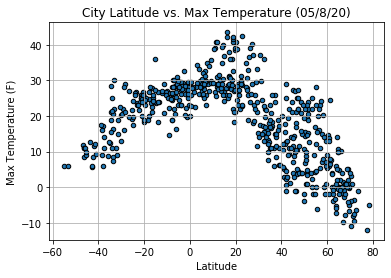

In [8]:
weather_df.plot(kind="scatter", x="Lat", y="Max Temp",figsize=(6,4), marker='o', grid=True,edgecolors="black", title="City Latitude vs. Max Temperature (05/8/20)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.savefig("LatvsTemp.png")
plt.show()

#### Latitude vs. Humidity Plot

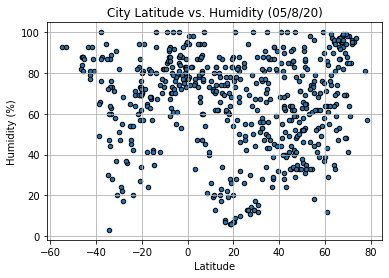

In [9]:
weather_df.plot(kind="scatter", x="Lat", y="Humidity",figsize=(6,4), marker='o', grid=True,edgecolors="black", title="City Latitude vs. Humidity (05/8/20)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.savefig("LatvsHum.png")
plt.show()

#### Latitude vs. Cloudiness Plot

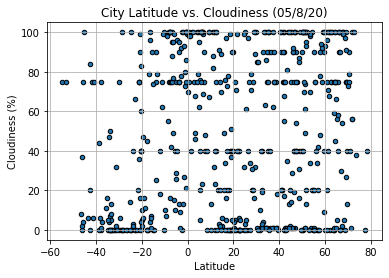

In [10]:
weather_df.plot(kind="scatter", x="Lat", y="Cloudiness",figsize=(6,4), marker='o', grid=True,edgecolors="black", title="City Latitude vs. Cloudiness (05/8/20)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.savefig("LatvsCloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

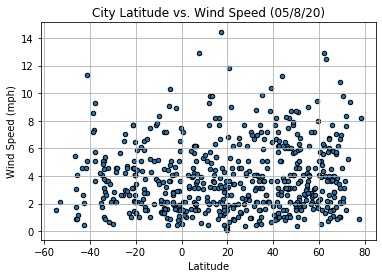

In [11]:
weather_df.plot(kind="scatter", x="Lat", y="Wind Speed",figsize=(6,4), marker='o', grid=True,edgecolors="black", title="City Latitude vs. Wind Speed (05/8/20)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.savefig("LatvsWind.png")
plt.show()

## Linear Regression

In [14]:
# OPTIONAL: Create a function to create Linear Regression plots
def line_reg_hw(x_values,y_values,x_desc,y_desc,x_ann,y_ann):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(x_ann,y_ann),fontsize=15,color="red")
    plt.xlabel(x_desc)
    plt.ylabel(y_desc)
    print(f"The r-squared is: {rvalue}")

In [15]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemisphere = weather_df.loc[weather_df["Lat"]>=0]
southern_hemisphere = weather_df.loc[weather_df["Lat"]<0]

northern_hemisphere.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,haines junction,96,CA,1589032243,64,60.75,-137.51,5.90,0.55
1,ukiah,1,US,1589032153,81,39.15,-123.21,11.11,0.69
2,bethel,20,US,1589032244,55,41.37,-73.41,2.78,6.70
6,sao filipe,6,CV,1589032245,70,14.90,-24.50,24.17,5.36
8,nemuro,81,JP,1589032245,69,43.32,145.57,9.20,2.86


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8132000237046977


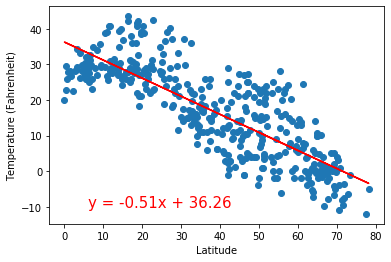

In [16]:
line_reg_hw(
    northern_hemisphere["Lat"],
    northern_hemisphere["Max Temp"],
    "Latitude",
    "Temperature (Fahrenheit)",6,-10)

plt.savefig("NHLatvsTemp.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7556481123195014


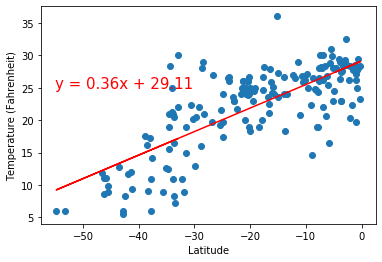

In [17]:
line_reg_hw(
    southern_hemisphere["Lat"],
    southern_hemisphere["Max Temp"],
    "Latitude","Temperature (Fahrenheit)",
    -55,25)

plt.savefig("SHLatvsTemp.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.14794627327433632


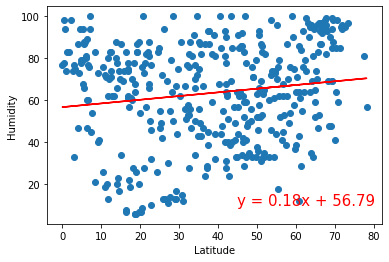

In [19]:
line_reg_hw(
    northern_hemisphere["Lat"],
    northern_hemisphere["Humidity"],
    "Latitude","Humidity",
    45,10)

plt.savefig("NHLatvsHum.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.1534000003694584


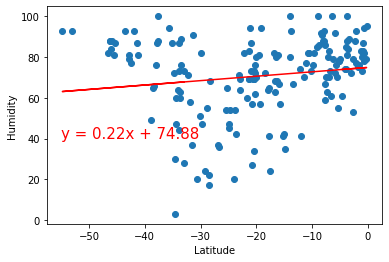

In [20]:
line_reg_hw(
    southern_hemisphere["Lat"],
    southern_hemisphere["Humidity"],
    "Latitude","Humidity",
    -55,40)

plt.savefig("SHLatvsHum.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.054060401174783106


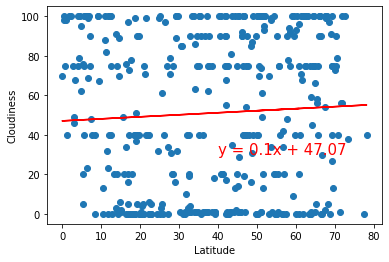

In [21]:
line_reg_hw(
    northern_hemisphere["Lat"],
    northern_hemisphere["Cloudiness"],
    "Latitude","Cloudiness",
    40,30)

plt.savefig("NHLatvsCloud.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.4305421537056057


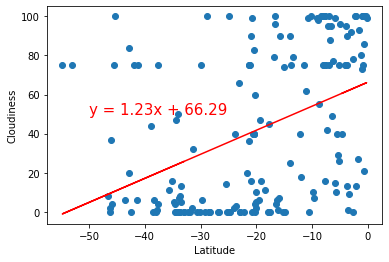

In [22]:
line_reg_hw(
    southern_hemisphere["Lat"],
    southern_hemisphere["Cloudiness"],
    "Latitude","Cloudiness",
    -50,50)

plt.savefig("SHLatvsCloud.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.08316216907371038


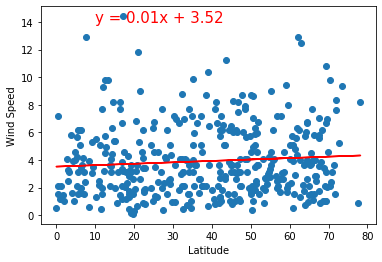

In [23]:
line_reg_hw(
    northern_hemisphere["Lat"],
    northern_hemisphere["Wind Speed"],
    "Latitude","Wind Speed",
    10,14)

plt.savefig("NHLatvsWind.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.037663543658133104


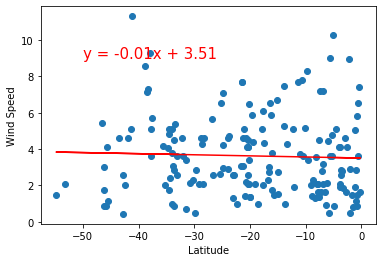

In [24]:
line_reg_hw(
    southern_hemisphere["Lat"],
    southern_hemisphere["Wind Speed"],
    "Latitude","Wind Speed",
    -50,9)

plt.savefig("SHLatvsWind.png")
plt.show()